In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
!pip install kneed
from kneed import KneeLocator

# Exercise 1: Clustering Method

In this exercise we will explore how each clustering algorithm discussed in the class works.

## Load Dataset

The dataset that we will use is a customer transaction in a certain mall. In this dataset there will 4 features including Gender, Age, Annual Income, and Spending Score. You can get the dataset from https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv

In [5]:
# load dataset and show the first five sample
url = 'https://raw.githubusercontent.com/NathaliaMinoque/dataset/refs/heads/main/mall_customers.csv'

data=pd.read_csv(url)
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
# rename the Annual Income (k$)	Spending Score (1-100) column
data.rename(columns={'Annual Income (k$)': 'Annual_Income', 'Spending Score (1-100)': 'Spending_Score'}, inplace=True)

data.head()

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
# describe data
data.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
# Check for null values in the dataset
data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual_Income,0
Spending_Score,0


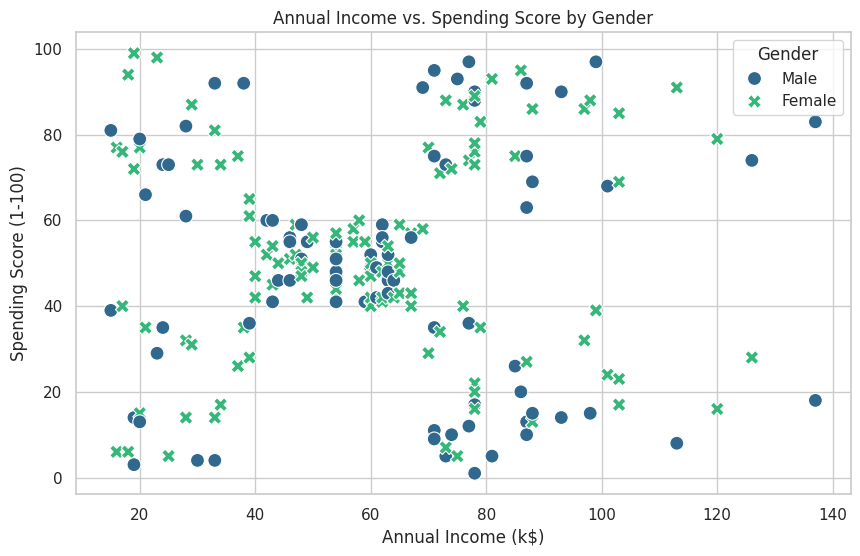

In [9]:
# make an insightful visualization and explain
sns.set(style="whitegrid")

# Create a scatter plot with age on the x-axis and annual income on the y-axis
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Annual_Income', y='Spending_Score', hue='Gender', style='Gender', palette='viridis', s=100, edgecolor='w')

# Adding plot details
plt.title('Annual Income vs. Spending Score by Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Gender')
plt.show()

## Data Preprocessing

For this case study, we only use income and spending score

In [10]:
# create new dataframe that consist only annual income and spending score
income_spending_df = data[['Annual_Income', 'Spending_Score']]

income_spending_df.head()

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


Before we analyze our data, we need to scale the data. You can use MinMaxScaler or StandardScaler.

In [11]:
# scale dataset with standard scaler
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(income_spending_df)

# Convert the scaled data back into a DataFrame for easier viewing
scaled_df = pd.DataFrame(scaled_data, columns=income_spending_df.columns)

# Display the first few rows of the scaled DataFrame
scaled_df.head()

,Annual_Income,Spending_Score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


In [12]:
# get stastical information on the new dataset
stats = scaled_df.describe()
stats

,Annual_Income,Spending_Score
count,2.000000e+02,2.000000e+02
mean,-2.131628e-16,-1.465494e-16
std,1.002509e+00,1.002509e+00
min,-1.738999e+00,-1.910021e+00
25%,-7.275093e-01,-5.997931e-01
50%,3.587926e-02,-7.764312e-03
75%,6.656748e-01,8.851316e-01
max,2.917671e+00,1.894492e+00


Then, we check the inisial position for our sample. You may use pairplot or scattered chart for the visualization option.

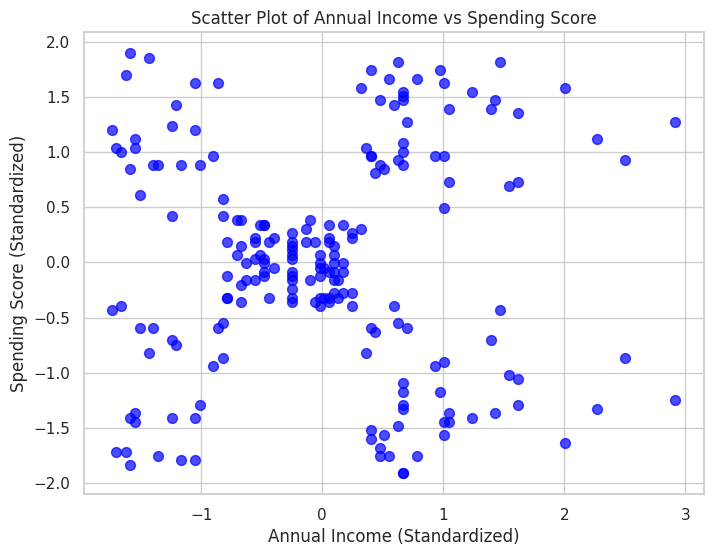

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_df["Annual_Income"],scaled_df["Spending_Score"], color='blue', s=50, alpha=0.7)
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')

# Display the plot
plt.show()

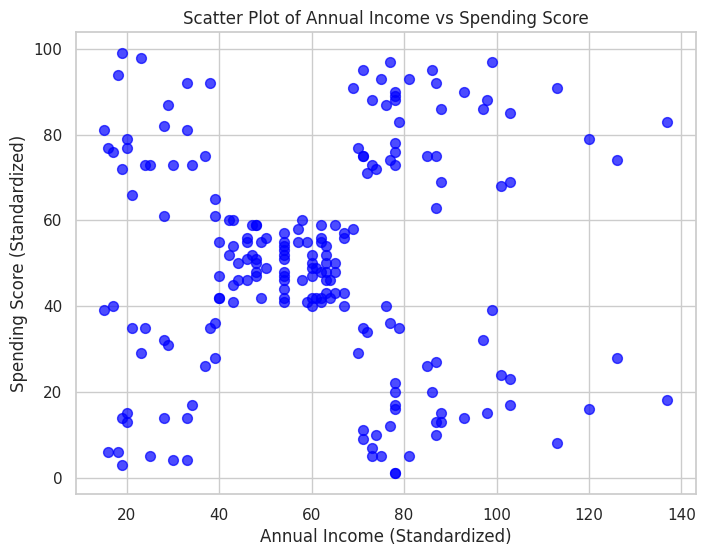

In [14]:
plt.figure(figsize=(8, 6))
plt.scatter(data["Annual_Income"],data["Spending_Score"], color='blue', s=50, alpha=0.7)
plt.title('Scatter Plot of Annual Income vs Spending Score')
plt.xlabel('Annual Income (Standardized)')
plt.ylabel('Spending Score (Standardized)')

# Display the plot
plt.show()

## Clustering

The evaluation for chosing the number of K in KMEANS can be done by several methods such as elbow method.

1. using elbow method
In this case study, the below parameter settings is used:
- init: random
- range: (1,11)
- max_iter: 300
- random state: 42

In [15]:
# set the parameter for evaluating K
sse=[]

for k in range(1,11):
    kmeans=KMeans(n_clusters=k, init='random', max_iter=300, random_state=42)
    kmeans.fit(scaled_df)
    sse.append(kmeans.inertia_)

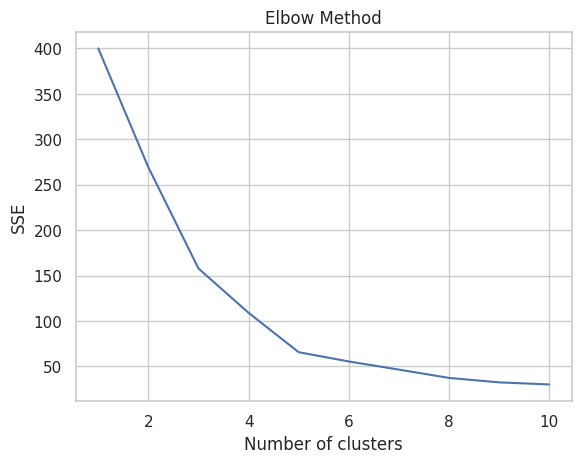

In [16]:
# manually visualize the elbow method using plotlib
plt.plot(range(1,11),sse)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [17]:
# using kneelocator to find the elbow/knee
kneedle = KneeLocator(range(1,11), sse, curve='convex', direction='decreasing')
print("The best k for your model is",kneedle.elbow)

The best k for your model is 5


### K-Means Algorithm

For using KMeans clustering algorithm, you need to define the number of cluster, initialization number, number of iteration, and random state.

In this case study, the below parameter settings is used:
- centroid initialization: random
- number of cluster: 5
- number of iteration: 300
- random state: 42

In [18]:
# assign cluster with K-Means algorithm
kmeans=KMeans(n_clusters=5, init='random', max_iter=300, random_state=42)
y_pred=kmeans.fit_predict(scaled_df)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 4,
       0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 2, 3, 4, 3, 2, 3, 2, 3,
       4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3], dtype=int32)

Visualize your result based on income and spending. You also can show the final position of the centroid.

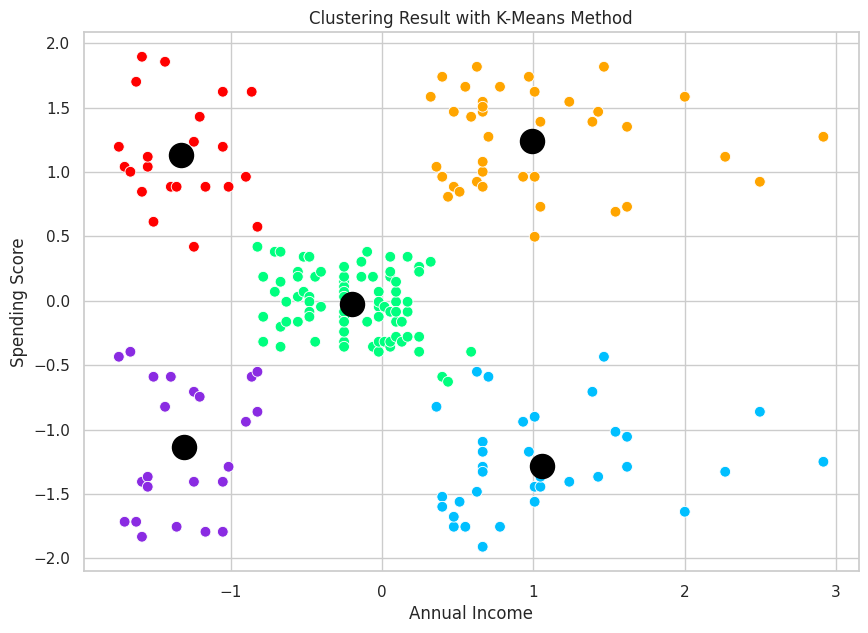

In [19]:
# visualize the result using scater chart
plt.figure(figsize=(10,7))

sns.scatterplot(x="Annual_Income", y="Spending_Score", hue=y_pred, palette=["blueviolet", "red", "deepskyblue", "orange", "springgreen"], legend=None, data=scaled_df, s=60)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="black")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Clustering Result with K-Means Method")
plt.show()

In [20]:
# Inverse transform the scaled data to get the original values
df = pd.DataFrame(scaler.inverse_transform(scaled_df), columns=scaled_df.columns)
df['cluster']=y_pred
df.head()

,Annual_Income,Spending_Score,cluster
0,15.0,39.0,0
1,15.0,81.0,1
2,16.0,6.0,0
3,16.0,77.0,1
4,17.0,40.0,0


In [25]:
# Group the data by cluster and calculate the mean spending and annual income for each cluster
cluster_stats = data.groupby(y_pred).agg({'Spending_Score': ['mean','std','min','max'], 'Annual_Income':['mean','std','min','max']})

# Rename the columns for clarity
cluster_stats = cluster_stats.rename_axis('cluster')
cluster_stats

Spending_Score                    Annual_Income                    
                  mean        std min max          mean        std min  max
cluster                                                                    
0            20.913043  13.017167   3  40     26.304348   7.893811  15   39
1            79.363636  10.504174  61  99     25.727273   7.566731  15   39
2            17.114286   9.952154   1  39     88.200000  16.399067  70  137
3            82.128205   9.364489  63  97     86.538462  16.312485  69  137
4            49.518519   6.530909  34  61     55.296296   8.988109  39   76

Write down (by adding text) the results of your interpretation and provide suggestions on what steps the company can take based on the clustering results you have created.

The clustering results reveal distinct customer segments based on their Spending Score and Annual Income. Cluster 0, with low spending and moderate income, can be targeted with budget-friendly products, discounts, and loyalty programs to increase engagement. Cluster 1, which has moderate income but higher spending, should be approached with exclusive deals, upselling, and targeted marketing focused on quality. Cluster 2, consisting of high-income but low-spending customers, may respond well to luxury or exclusive products, personalized experiences, and content that highlights the value of higher-ticket items. Cluster 3, with both high income and high spending, is ideal for premium offerings, targeted luxury marketing, and a robust loyalty program to foster brand advocacy. Finally, Cluster 4, with moderate income and moderate spending, can be engaged through value deals, tiered pricing, and regular reminders about sales or new products, encouraging incremental spending. Tailoring strategies to these clusters will help the company optimize customer engagement and drive sales.

<write here>